In [53]:
import pandas as pd
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-11-15 00:00:00+00:00,4.593211,4.604491,4.690419,4.452063,4.494404,477844390
2004-11-16 00:00:00+00:00,4.286864,4.297392,4.469995,4.254802,4.420929,839832142
2004-11-17 00:00:00+00:00,4.285871,4.296396,4.420929,4.209223,4.209721,728034662
2004-11-18 00:00:00+00:00,4.162636,4.172859,4.344217,4.127778,4.241352,667677273
2004-11-19 00:00:00+00:00,4.208849,4.219185,4.233631,4.147454,4.211713,352086780


In [5]:
google_data.shape

(5035, 6)

In [6]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,47.493390,47.603597,48.084377,47.109843,47.584924,1.111576e+08
std,45.402562,45.496734,45.968382,45.025854,45.472200,1.440292e+08
min,4.102013,4.112087,4.221676,4.017691,4.096396,1.584340e+05
25%,13.216383,13.248840,13.381343,13.110732,13.268516,2.669600e+07
50%,27.700472,27.768499,27.920347,27.569307,27.788706,5.195000e+07
75%,62.306986,62.460001,63.183125,61.939501,62.438751,1.357409e+08
max,192.406723,192.660004,193.309998,190.619995,191.750000,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-11-15 00:00:00+00:00 to 2024-11-14 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5035 non-null   float64
 1   (Close, GOOG)      5035 non-null   float64
 2   (High, GOOG)       5035 non-null   float64
 3   (Low, GOOG)        5035 non-null   float64
 4   (Open, GOOG)       5035 non-null   float64
 5   (Volume, GOOG)     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [8]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

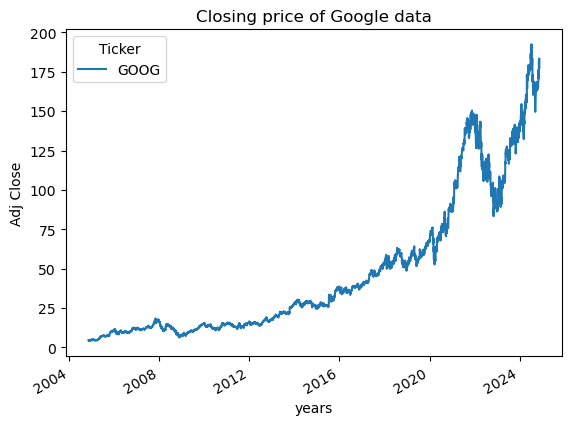

In [10]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [11]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [12]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

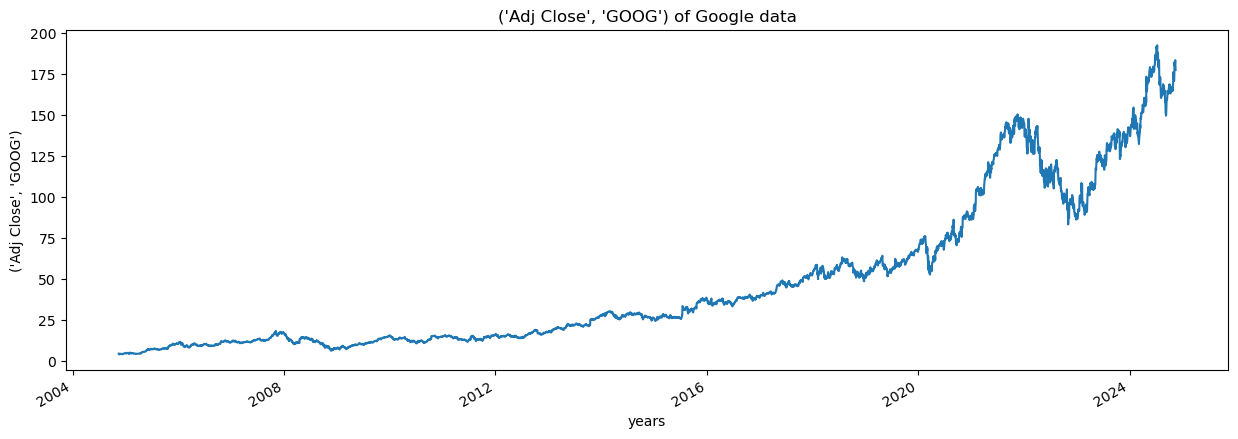

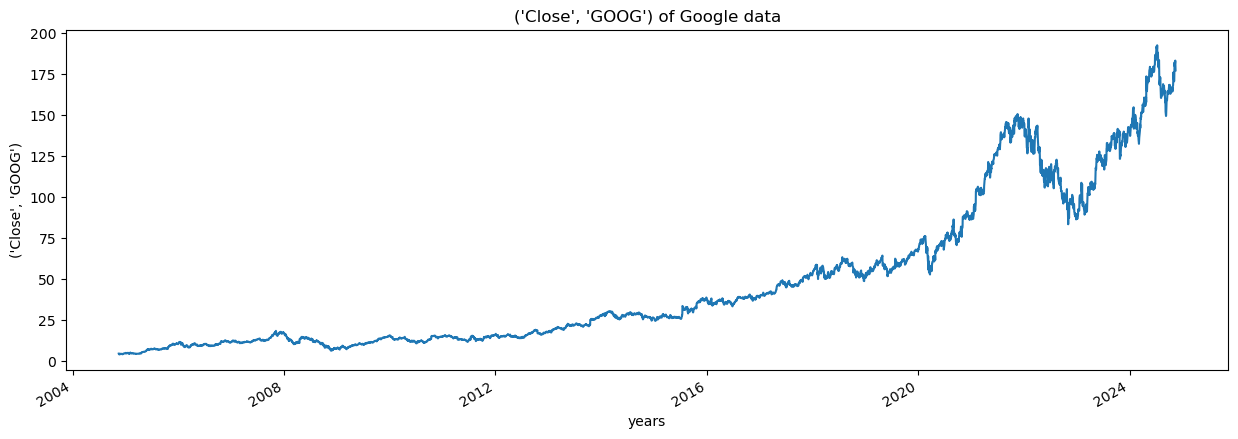

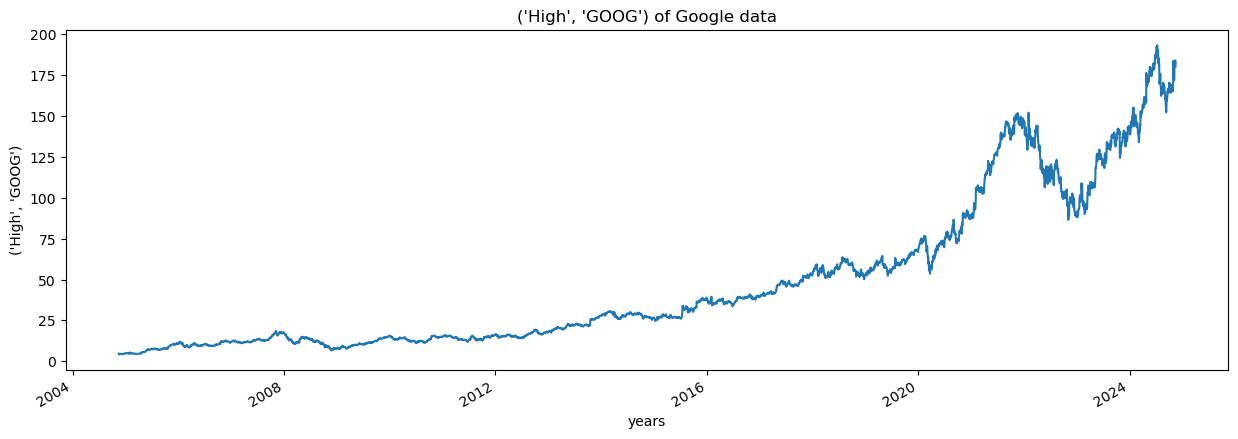

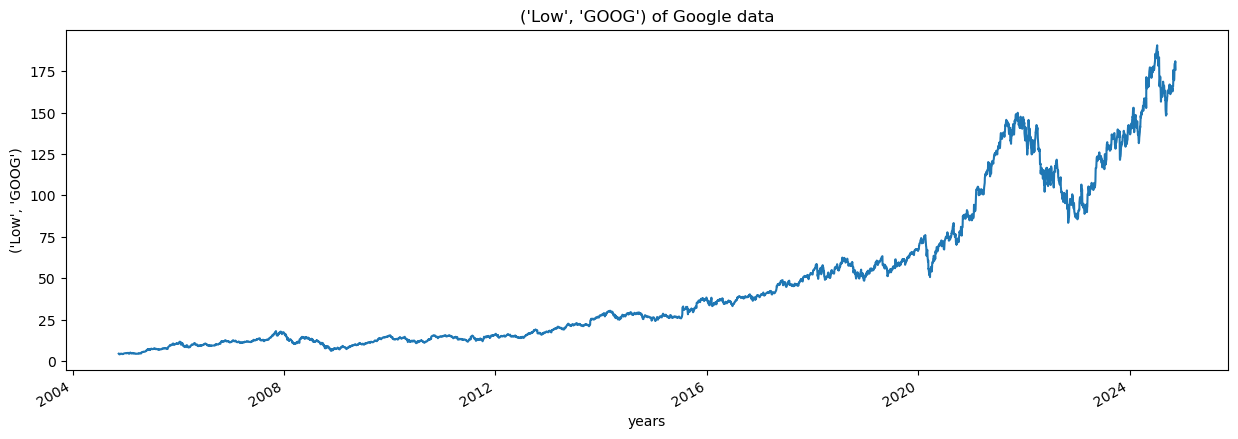

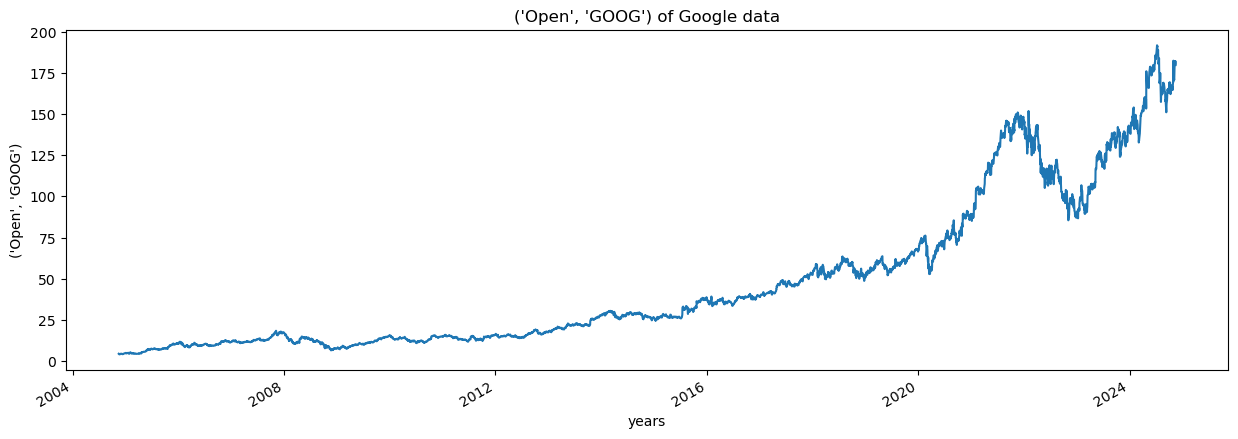

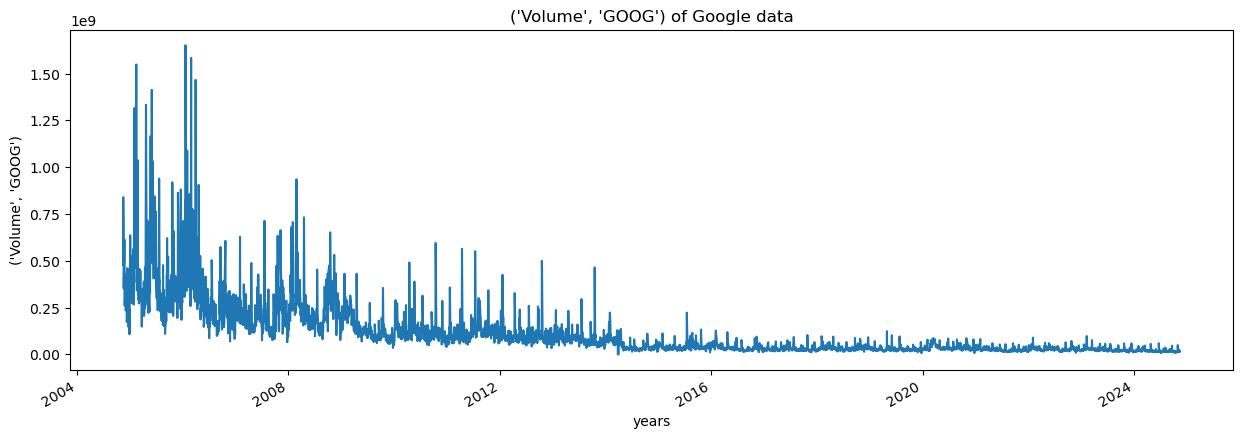

In [13]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [19]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [20]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-11-03 00:00:00+00:00         NaN
2005-11-04 00:00:00+00:00         NaN
2005-11-07 00:00:00+00:00         NaN
2005-11-08 00:00:00+00:00         NaN
2005-11-09 00:00:00+00:00    6.105124
Name: MA_for_250_days, dtype: float64

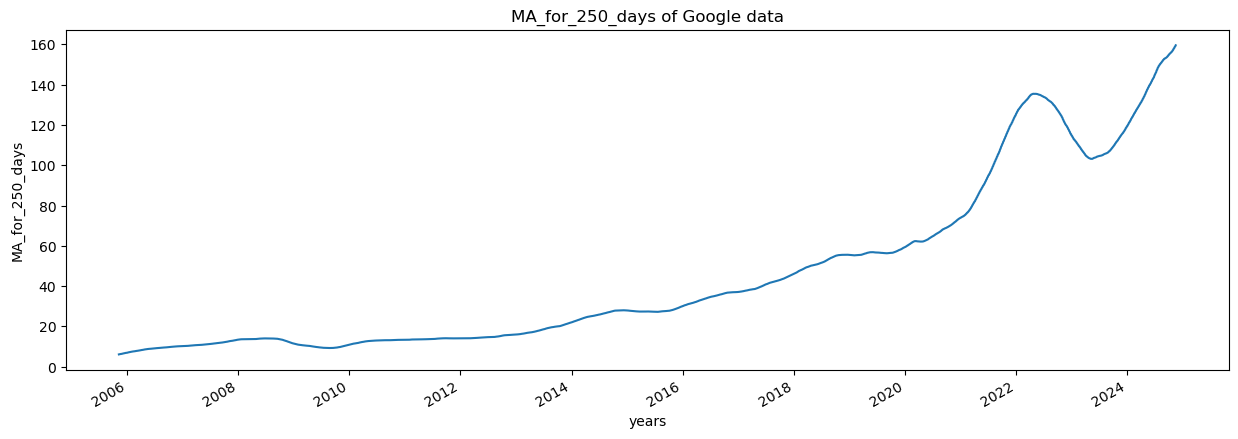

In [21]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

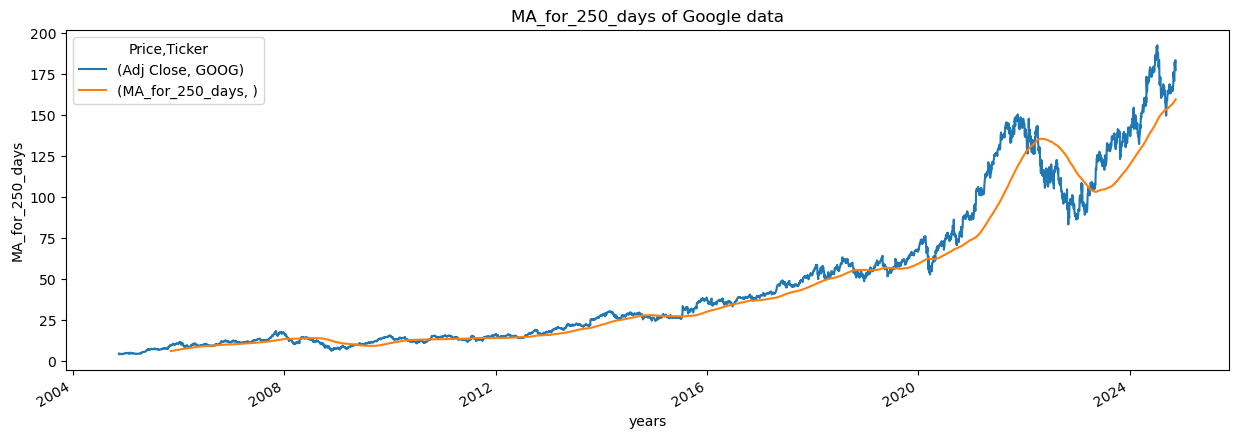

In [22]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

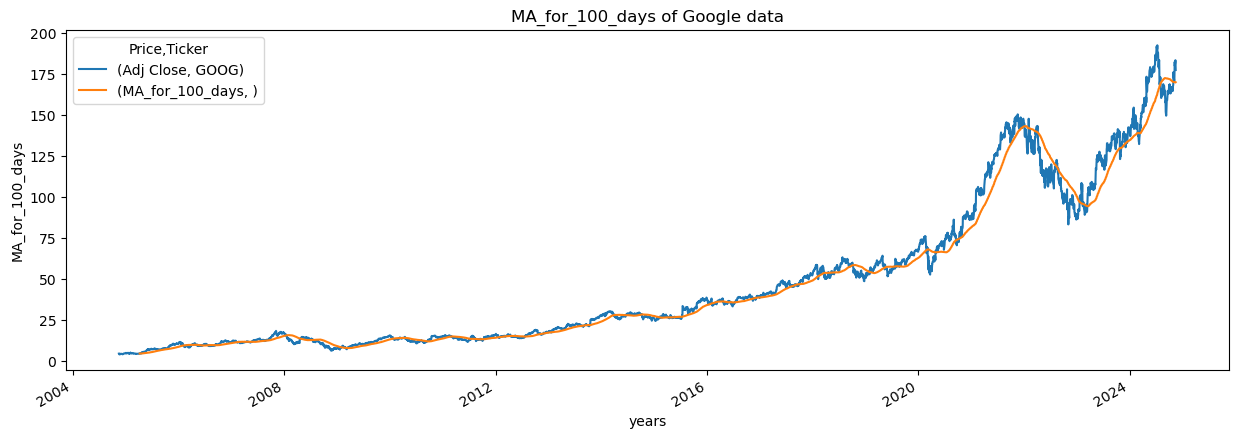

In [23]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

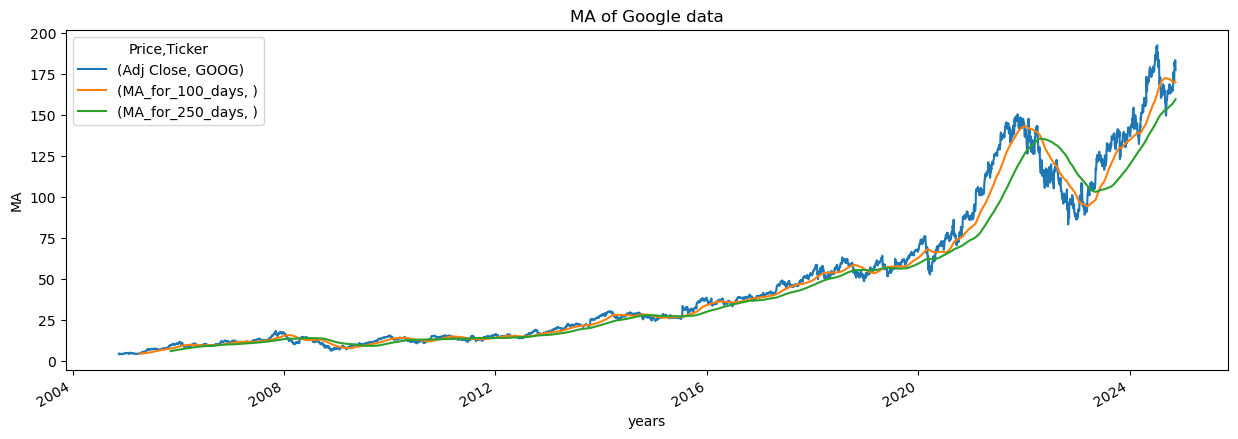

In [24]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-11-15 00:00:00+00:00,4.593211,NaN
2004-11-16 00:00:00+00:00,4.286864,-0.066695
2004-11-17 00:00:00+00:00,4.285871,-0.000232
2004-11-18 00:00:00+00:00,4.162636,-0.028754
2004-11-19 00:00:00+00:00,4.208849,0.011102


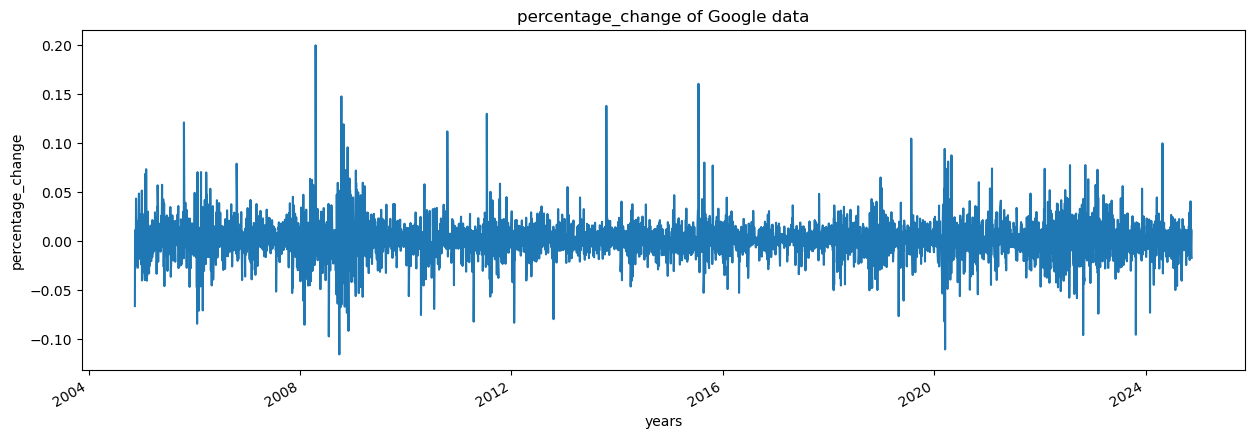

In [26]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [27]:
Adj_close_price = google_data[['Adj Close']]

In [28]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([4.10201311]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00260853],
       [0.00098166],
       [0.00097638],
       ...,
       [0.95174462],
       [0.93671578],
       [0.92004068]])

In [30]:
len(scaled_data)

5035

In [31]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127458],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0.00496241],
        [0.00387914],
        [0.00374852],
        [0.00309408],
        [0.00379338],
        [0.00395304],
        [0.00375248],
        [0.00399526],
        [0.00398866],
        [0.00460088],
        [0.00511942],
        [0.00424859],
        [0

In [33]:

int(len(x_data)*0.7)

3454

In [34]:
4908-100-int(len(x_data)*0.7)

1354

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 168s 45ms/step - loss: 2.1631e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 151s 43ms/step - loss: 4.2745e-05


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [42]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step


In [43]:
predictions

array([[0.25368002],
       [0.25528064],
       [0.25485623],
       ...,
       [0.9318239 ],
       [0.93675196],
       [0.9317718 ]], dtype=float32)

In [44]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 51.87116 ],
       [ 52.17256 ],
       [ 52.092644],
       ...,
       [179.56883 ],
       [180.49681 ],
       [179.55904 ]], dtype=float32)

In [45]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.72696686],
       [ 51.65364456],
       [ 52.16439438],
       ...,
       [183.32000732],
       [180.49000549],
       [177.3500061 ]])

In [46]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [47]:
rmse

2.497624423308457

In [48]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-12-28 00:00:00+00:00,51.726967,51.871159
2018-12-31 00:00:00+00:00,51.653645,52.172562
2019-01-02 00:00:00+00:00,52.164394,52.092644
2019-01-03 00:00:00+00:00,50.678543,52.173275
2019-01-04 00:00:00+00:00,53.404346,51.527943


<Figure size 640x480 with 0 Axes>

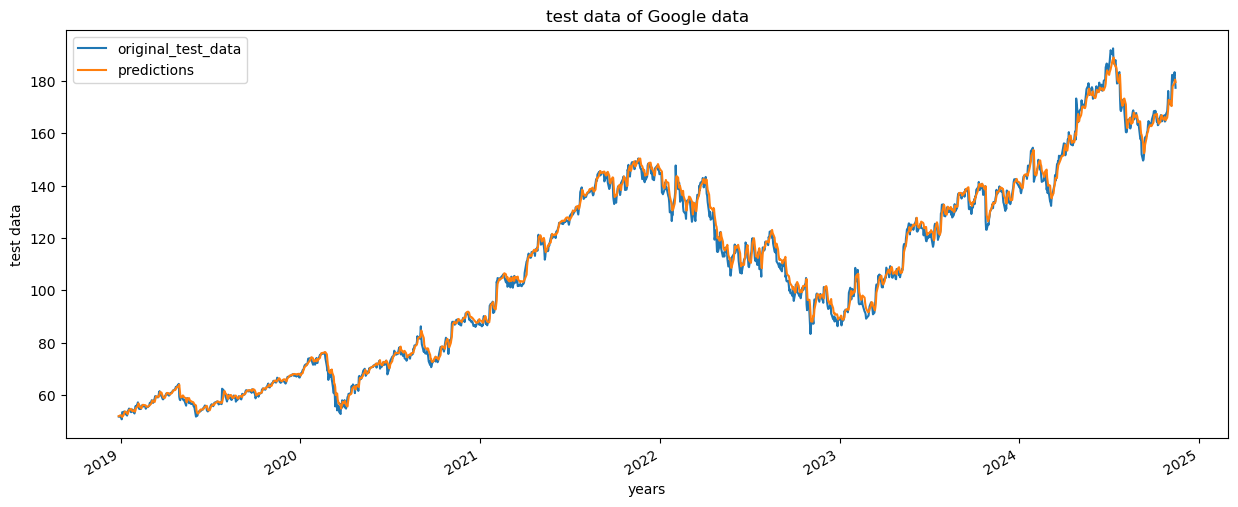

In [49]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

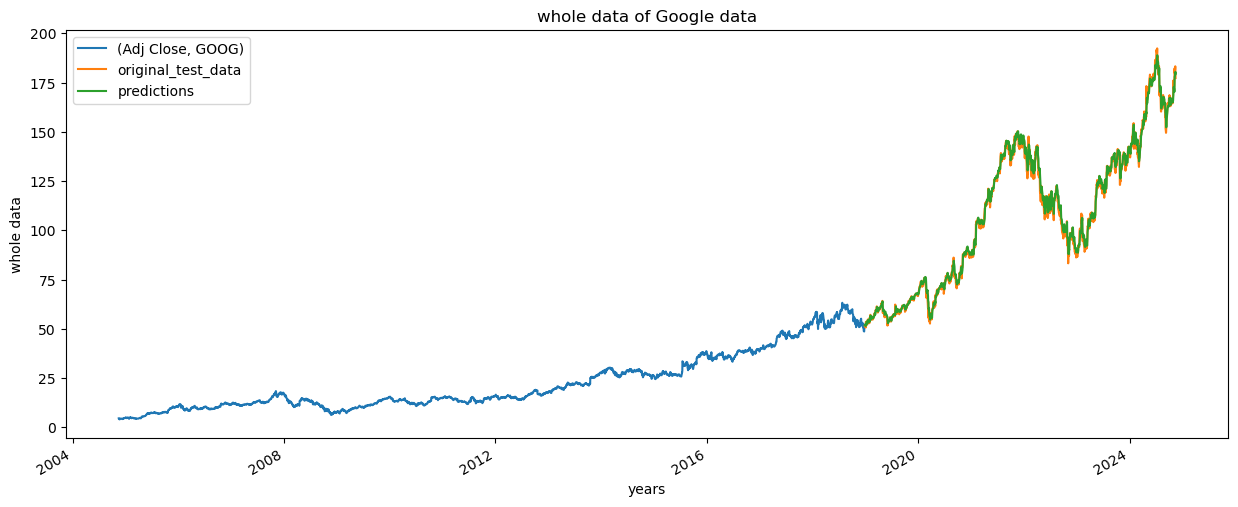

In [50]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [51]:
model.save("Latest_stock_price_model.keras")